# Datasetovi - opis

Za air quality odabrali smo 3(ili samo ona 2) dataseta sa [sledeceg sajta](archive.ics.uci.edu/ml/datasets):
1. [Beijing Multi-Site Air-Quality Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data) - dataset sadrzi 6 glavnih polutanata i 6 glavnih meteoroloskih varijabli, merenih na nekoliko razlicitih sanica, svakog sata, oko Pekinga. Polja unutar dataseta su sledeca:
    1. No: row number
    1. year: year of data in this row
    1. month: month of data in this row
    1. day: day of data in this row
    1. hour: hour of data in this row
    1. PM2.5: PM2.5 concentration (ug/m^3)
    1. PM10: PM10 concentration (ug/m^3)
    1. SO2: SO2 concentration (ug/m^3)
    1. NO2: NO2 concentration (ug/m^3)
    1. CO: CO concentration (ug/m^3)
    1. O3: O3 concentration (ug/m^3)
    1. TEMP: temperature (degree Celsius)
    1. PRES: pressure (hPa)
    1. DEWP: dew point temperature (degree Celsius)
    1. RAIN: precipitation (mm)
    1. wd: wind direction
    1. WSPM: wind speed (m/s)
    1. station: name of the air-quality monitoring site


2. [Beijing PM2.5 Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data) - Sadrzi podatke iz US ambasade u Pekingu i glavnog aerodroma u Pekingu, takodje PM2.5 cestice merene svakog sata. Obelezja:
    1. No: row number
    1. year: year of data in this row
    1. month: month of data in this row
    1. day: day of data in this row
    1. hour: hour of data in this row
    1. pm2.5: PM2.5 concentration (ug/m^3)
    1. DEWP: Dew Point (â„ƒ)
    1. TEMP: Temperature (â„ƒ)
    1. PRES: Pressure (hPa)
    1. cbwd: Combined wind direction
    1. Iws: Cumulated wind speed (m/s)
    1. Is: Cumulated hours of snow
    1. Ir: Cumulated hours of rain


# Ucitavanje podataka

In [2]:
import pandas as pd

base_data_folder = "./Data"

## Beijing dataset

In [3]:
beijing_folder = "/Beijing dataset"

In [41]:
beijing_ds = pd.read_csv(base_data_folder + beijing_folder + "/Beijing.csv")
beijing_ds['datetime'] = pd.to_datetime(beijing_ds[['year', 'month', 'day', 'hour']])
beijing_ds.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
beijing_ds.rename(columns={'pm2.5': 'PM2.5'}, inplace=True)
beijing_ds.head(10)

,No,PM2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
5,6,NaN,-19,-10.0,1017.0,NW,16.10,0,0,2010-01-01 05:00:00
6,7,NaN,-19,-9.0,1017.0,NW,19.23,0,0,2010-01-01 06:00:00
7,8,NaN,-19,-9.0,1017.0,NW,21.02,0,0,2010-01-01 07:00:00
8,9,NaN,-19,-9.0,1017.0,NW,24.15,0,0,2010-01-01 08:00:00
9,10,NaN,-20,-8.0,1017.0,NW,27.28,0,0,2010-01-01 09:00:00


In [60]:
beijing_ds['No'].value_counts().fillna()

1        1
29220    1
29212    1
29213    1
29214    1
        ..
14610    1
14611    1
14612    1
14613    1
43824    1
Name: No, Length: 43824, dtype: int64

In [45]:
beijing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        43824 non-null  int64         
 1   PM2.5     41757 non-null  float64       
 2   DEWP      43824 non-null  int64         
 3   TEMP      43824 non-null  float64       
 4   PRES      43824 non-null  float64       
 5   cbwd      43824 non-null  object        
 6   Iws       43824 non-null  float64       
 7   Is        43824 non-null  int64         
 8   Ir        43824 non-null  int64         
 9   datetime  43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 3.3+ MB


In [34]:
print(beijing_ds.isnull().sum(), "\n")
print(beijing_ds.isna().sum(), "\n")
print(beijing_ds.shape)

No             0
pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
datetime       0
dtype: int64 

No             0
pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
datetime       0
dtype: int64 

(43824, 10)


In [57]:
beijing_ds.describe()

,No,PM2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


## PRSA dataset

In [6]:
prsa_folder = "/PRSA Data - Chinese cities"

In [103]:
import os
datasets = [pd.read_csv(base_data_folder + prsa_folder+ "/" + file) for file in os.listdir(base_data_folder + prsa_folder) if file.endswith('.csv')]

prsa_dataset = pd.concat(datasets, axis=0)

prsa_dataset['datetime'] = pd.to_datetime(prsa_dataset[['year', 'month', 'day', 'hour']])
prsa_dataset.drop(columns=['year', 'month', 'day', 'hour', 'PM10'], inplace=True)

del datasets
prsa_dataset.head(10)

,No,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
5,6,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00
6,7,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01 06:00:00
7,8,3.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01 07:00:00
8,9,3.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01 08:00:00
9,10,3.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01 09:00:00


In [88]:
prsa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412966 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        412966 non-null  int64         
 1   PM2.5     409436 non-null  float64       
 2   SO2       409856 non-null  float64       
 3   NO2       406761 non-null  float64       
 4   CO        398197 non-null  float64       
 5   O3        405458 non-null  float64       
 6   TEMP      412966 non-null  float64       
 7   PRES      412966 non-null  float64       
 8   DEWP      412966 non-null  float64       
 9   RAIN      412966 non-null  float64       
 10  wd        412966 non-null  int32         
 11  WSPM      412966 non-null  float64       
 12  station   412966 non-null  int32         
 13  datetime  412966 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int32(2), int64(1)
memory usage: 44.1 MB


## EDA

In [101]:
print(prsa_dataset.isna().sum())
print("\n", prsa_dataset.shape)

No              0
PM2.5        3530
SO2          3110
NO2          6205
CO          14769
O3           7508
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
datetime        0
dtype: int64

 (412966, 14)


In [104]:
prsa_dataset['station'].value_counts()

Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

Vidimo da su, po kategorickom atributu 'stanice', redovi izbalansirani

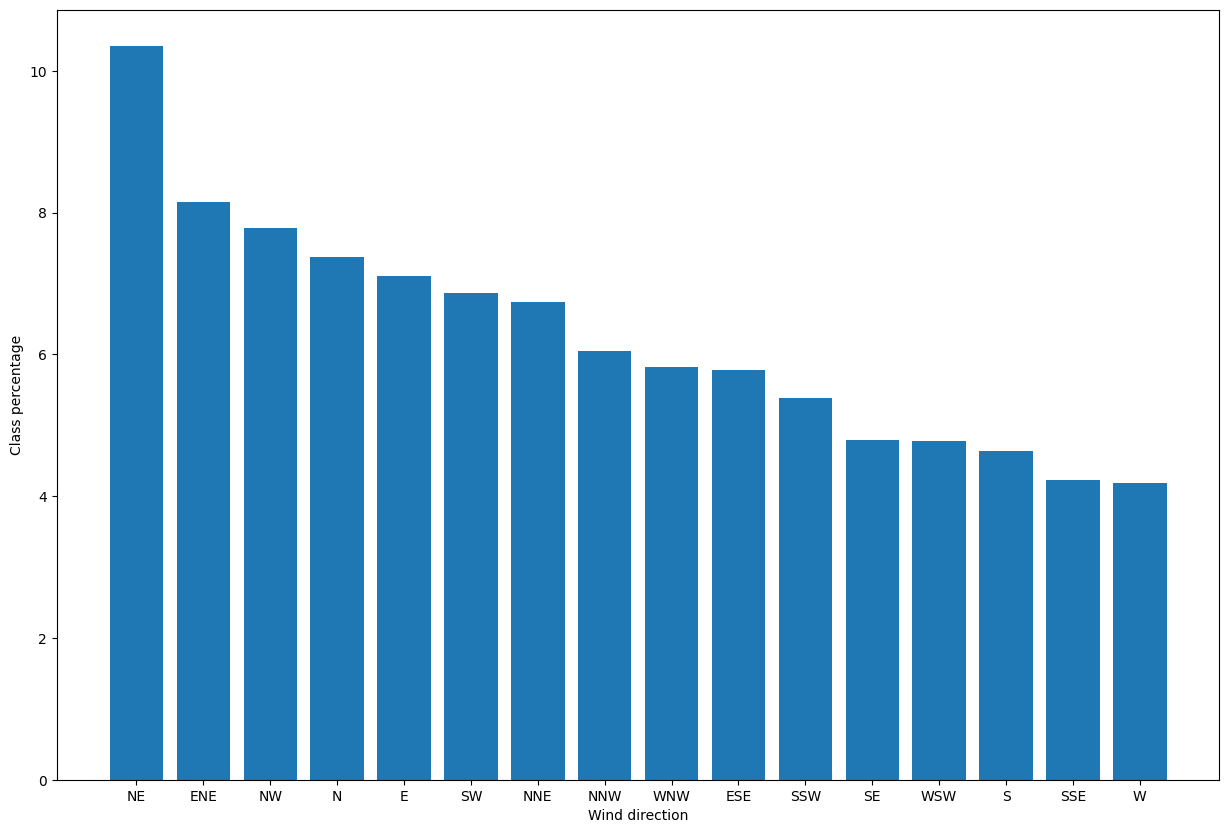

In [121]:
import matplotlib.pyplot as plt
import numpy as np
bar_data = 100 * prsa_dataset['wd'].value_counts() / prsa_dataset['wd'].value_counts().sum()

#NOTE: Poasonova raspodela, plotovati nekako
lambd = 5
x_poisson = np.arange(0, len(bar_data.index))
poisson_distribution = np.random.poisson(lambd, size=prsa_dataset.shape[0])
y_poisson = np.exp(-lambd) * np.power(lambd, x_poisson) / np.math.factorial(x_poisson)

plt.figure(figsize=(15,10))
plt.bar(bar_data.index, bar_data.values)
plt.xlabel('Wind direction')
plt.ylabel('Class percentage')
plt.show()

Kada je rec o kategorickoj varijabli 'wd', prati priblizno Poasonovu raspodelu

### Inicijalno uklanjanje nepozeljnih vrednosti

In [81]:
prsa_dataset.dropna(inplace=True, subset=['wd']) # Ne mozemo znati wind direction, ako nije specificiran?
prsa_dataset.dropna(inplace=True, subset=['SO2', 'NO2', 'CO', 'O3', 'PM2.5'], how="all") # redovi koji u svih 5 kolona sadrze Null/NaN najverovatnije su neispravni
prsa_dataset.dropna(inplace=True, subset=['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PRES'], thresh=3)
prsa_dataset.dropna(inplace=True, subset=['TEMP', 'PRES', 'DEWP', 'RAIN'], how='any') # Svakako ima <100 redova koji imaju Null/NaN vrednosti u ovim poljima, mozemo ih ukloniti

### Enkodovanje kategorickih atributa

In [87]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['wd', 'station']

for abc in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(prsa_dataset[abc])
    encoded_column = label_encoder.transform(prsa_dataset[abc])
    prsa_dataset[abc] = encoded_column

### Korelaciona matrica

In [99]:
correlation_matrix = prsa_dataset.drop(['No', 'wd', 'station'], axis=1).corr(method='pearson')
correlation_matrix.style.background_gradient()

C:\Users\Zamachi\AppData\Local\Temp\ipykernel_18272\2440993964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = prsa_dataset.drop(['No', 'wd', 'station'], axis=1).corr(method='pearson')


,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.482995,0.667100,0.789907,-0.149231,-0.130356,0.017981,0.115331,-0.014261,-0.272123
SO2,0.482995,1.000000,0.500159,0.536656,-0.165945,-0.322048,0.223261,-0.266350,-0.040265,-0.109836
NO2,0.667100,0.500159,1.000000,0.705708,-0.471612,-0.277682,0.173347,-0.031002,-0.043692,-0.400417
CO,0.789907,0.536656,0.705708,1.000000,-0.312735,-0.325441,0.187634,-0.056288,-0.013251,-0.297140
O3,-0.149231,-0.165945,-0.471612,-0.312735,1.000000,0.595016,-0.446066,0.312535,0.023211,0.294105
TEMP,-0.130356,-0.322048,-0.277682,-0.325441,0.595016,1.000000,-0.813026,0.820395,0.037552,0.029417
PRES,0.017981,0.223261,0.173347,0.187634,-0.446066,-0.813026,1.000000,-0.750499,-0.060868,0.068652
DEWP,0.115331,-0.266350,-0.031002,-0.056288,0.312535,0.820395,-0.750499,1.000000,0.086257,-0.298765
RAIN,-0.014261,-0.040265,-0.043692,-0.013251,0.023211,0.037552,-0.060868,0.086257,1.000000,0.021021
WSPM,-0.272123,-0.109836,-0.400417,-0.297140,0.294105,0.029417,0.068652,-0.298765,0.021021,1.000000


# Prvo se otarasiti Null/NaN vrednosti
# ?
# Splitovati dataset na train/test
# Uraditi imputing vrednosti